# Gradient descent algorithm

This notebook is heavily inspired from the following work at scipython [blog](https://scipython.com/blog/visualizing-the-gradient-descent-method/)
- Visualizing gradients

- Develop an intuition to the underlying behavior

## Import libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt

## Visualizing gradient descent

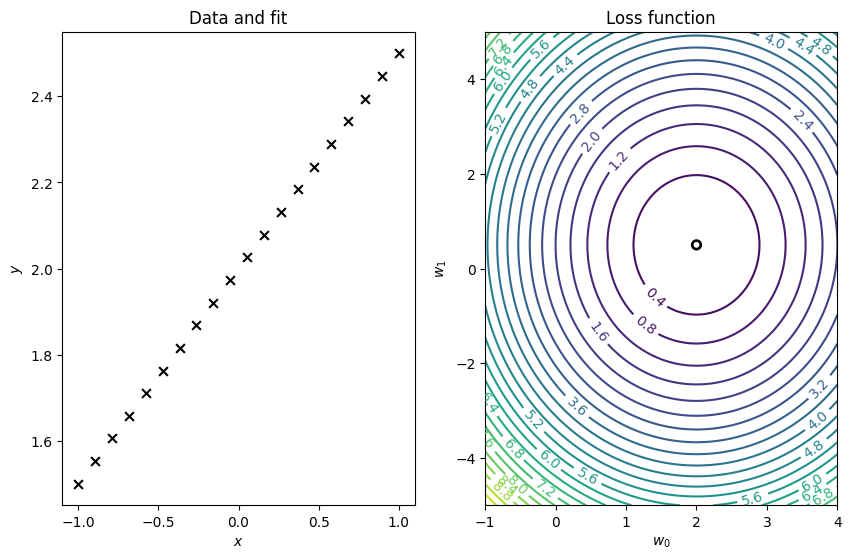

In [14]:
# The data to fit
m = 20 #spacing
w0_true = 2
w1_true = 0.5
x = np.linspace(-1,1,m)
y = w0_true + w1_true * x

# The plot: LHS is the data, RHS will be the loss function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def loss_func(w0, w1):
    """The loss function, L(w0, w1) describing the goodness of fit."""
    w0 = np.atleast_3d(np.asarray(w0))
    w1 = np.atleast_3d(np.asarray(w1))
    return np.average((y-hypothesis(x, w0, w1))**2, axis=2)/2

def hypothesis(x, w0, w1):
    "Our 'hypothesis function', of a straight line."
    return w0 + w1*x

# First construct a grid of (w0, w1) parameter pairs and their
# corresponding loss function values.
w0_grid = np.linspace(-1,4,101)
w1_grid = np.linspace(-5,5,101)
J_grid = loss_func(w0_grid[np.newaxis,:,np.newaxis],
                   w1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS loss function
X, Y = np.meshgrid(w0_grid, w1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the loss function contour plot
ax[1].scatter([w0_true]*2,[w1_true]*2,s=[50,10], color=['k','w'])

# Labels, titles and a legend.
ax[1].set_xlabel(r'$w_0$')
ax[1].set_ylabel(r'$w_1$')
ax[1].set_title('Loss function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')

plt.show()


## Gradient descent learning from data

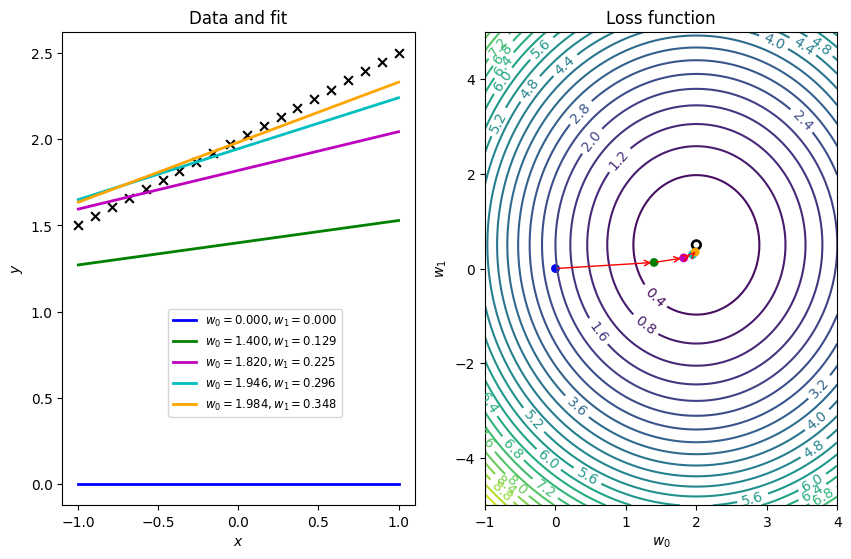

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')


# First construct a grid of (w0, w1) parameter pairs and their
# corresponding loss function values.
w0_grid = np.linspace(-1,4,101)
w1_grid = np.linspace(-5,5,101)
J_grid = loss_func(w0_grid[np.newaxis,:,np.newaxis],
                   w1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS loss function
X, Y = np.meshgrid(w0_grid, w1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the loss function contour plot
ax[1].scatter([w0_true]*2,[w1_true]*2,s=[50,10], color=['k','w'])


# Take N steps with learning-rate (mu) down the steepest gradient,
# starting at (w0, w1) = (0, 0).
N = 5
mu = 0.7
w = [np.array((0,0))]
L = [loss_func(*w[0])[0]]


for j in range(N-1):
    last_w = w[-1]
    this_w = np.empty((2,))
    this_w[0] = last_w[0] - mu / m * np.sum(
                                    (hypothesis(x, *last_w) - y))
    this_w[1] = last_w[1] - mu / m * np.sum(
                                    (hypothesis(x, *last_w) - y) * x)
    w.append(this_w)
    L.append(loss_func(*this_w))


# Annotate the loss function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *w[0]), color=colors[0], lw=2,
           label=r'$w_0 = {:.3f}, w_1 = {:.3f}$'.format(*w[0]))
for j in range(1,N):
    ax[1].annotate('', xy=w[j], xytext=w[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *w[j]), color=colors[j], lw=2,
           label=r'$w_0 = {:.3f}, w_1 = {:.3f}$'.format(*w[j]))
ax[1].scatter(*zip(*w), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$w_0$')
ax[1].set_ylabel(r'$w_1$')
ax[1].set_title('Loss function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()
